In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, spearmanr
import sys
import matplotlib.pyplot as plt

Load the coseq matrix

In [2]:
coseq_matrix_path = './smallseq_counts_mgdb.tsv'
df_coseq_all = pd.read_csv(coseq_matrix_path, sep='\t', index_col=0)
print(df_coseq_all.shape)

(70558, 1152)


____________

In [3]:
remove_pre_2R = True

In [4]:
mirna_origin_file_path = '../MirGeneDB_miRNA_origin/hsa_mirgenedb3.0_to_everything.mirna_origin.tsv'
df_mirna_origin = pd.read_csv(mirna_origin_file_path, sep='\t', header=None)
# keep only columns 8,14,15 and remove duplicates
df_mirna_origin = df_mirna_origin[[0, 14, 15]]
df_mirna_origin = df_mirna_origin.drop_duplicates()
cols = ["miRNA", "locus_node_of_origin", "family_node_of_origin"]
df_mirna_origin.columns = cols
df_mirna_origin

mirna_lno_dict = {}
for index, row in df_mirna_origin.iterrows():
	mirna = row['miRNA']
	lno = row['family_node_of_origin']
	if mirna not in mirna_lno_dict:
		mirna_lno_dict[mirna] = []
	mirna_lno_dict[mirna].append(lno)

mirna_lno_dict['Hsa-Let-7-P1d'][0]

'Bilateria'

In [5]:
pre_2R_clades = ['Bilateria', 'Chordata', 'Eumetazoa', 'Vertebrata', 'Nephrozoa', 'Olphactores']

def all_clades_in_pre2R(mirna):
    clades = mirna_lno_dict.get(mirna, [])
    return all(clade in pre_2R_clades for clade in clades)

____________

In [6]:
df_coseq_all

,unknown_mirna,type,E7_9_9,E7_9_17,E7_9_25,E6_21_1,E6_24_9,E6_24_17,E5_14_1,E5_14_9,...,E6_40_8,E6_40_16,E6_40_24,E5_31_24,E5_32_16,E5_32_24,E7_44_8,E7_44_32,E7_44_40,E7_44_48
ID,,,,,,,,,,,,,,,,,,,,,
hsa-miR-3158-3p,premirna_not_in_mirgenedb,miRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-miR-3158-5p,premirna_not_in_mirgenedb,miRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-miR-146b-5p,Hsa-Mir-146-P1,miRNA,0.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,...,3.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0
hsa-miR-146b-3p,Hsa-Mir-146-P1,miRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-miR-1307-3p,Hsa-Mir-1307,miRNA,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
os-piRNA-13,unknown_mirna,piRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
os-piRNA-14,unknown_mirna,piRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
os-piRNA-11,unknown_mirna,piRNA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
 # select only the columns starting with "E7" or "ID" or "unknown_mirna" or "type"
stage = 'E4'
df_coseq = df_coseq_all.loc[:, df_coseq_all.columns.str.startswith((stage, 'ID', 'unknown_mirna', 'type'))]
print(df_coseq.shape)

(70558, 117)


In [8]:
df_coseq

,unknown_mirna,type,E4_12_9,E4_12_5,E4_12_8,E4_4_1,E4_4_2,E4_4_4,E4_4_5,E4_4_6,...,E4_9_14,E4_30_1,E4_30_9,E4_30_2,E4_30_10,E4_30_3,E4_30_4,E4_30_5,E4_30_6,E4_30_7
ID,,,,,,,,,,,,,,,,,,,,,
hsa-miR-3158-3p,premirna_not_in_mirgenedb,miRNA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-miR-3158-5p,premirna_not_in_mirgenedb,miRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
hsa-miR-146b-5p,Hsa-Mir-146-P1,miRNA,0.0,3.0,0.0,1.0,5.0,4.0,9.0,33.0,...,6.0,4.0,1.0,3.0,10.0,16.0,4.0,1.0,3.0,11.0
hsa-miR-146b-3p,Hsa-Mir-146-P1,miRNA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
hsa-miR-1307-3p,Hsa-Mir-1307,miRNA,1.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,...,9.0,2.0,1.0,0.0,6.0,12.0,2.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
os-piRNA-13,unknown_mirna,piRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
os-piRNA-14,unknown_mirna,piRNA,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
os-piRNA-11,unknown_mirna,piRNA,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0


In [9]:
# remov the rows whose second column is "unknown_mirna"
df_coseq = df_coseq[df_coseq.iloc[:, 0] != 'unknown_mirna']
df_coseq
print(df_coseq.shape)

(1761, 117)


In [10]:
# remove the "type" column
df_coseq = df_coseq.drop(columns=['type'])
df_coseq

,unknown_mirna,E4_12_9,E4_12_5,E4_12_8,E4_4_1,E4_4_2,E4_4_4,E4_4_5,E4_4_6,E4_4_9,...,E4_9_14,E4_30_1,E4_30_9,E4_30_2,E4_30_10,E4_30_3,E4_30_4,E4_30_5,E4_30_6,E4_30_7
ID,,,,,,,,,,,,,,,,,,,,,
hsa-miR-3158-3p,premirna_not_in_mirgenedb,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-miR-3158-5p,premirna_not_in_mirgenedb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
hsa-miR-146b-5p,Hsa-Mir-146-P1,0.0,3.0,0.0,1.0,5.0,4.0,9.0,33.0,23.5,...,6.0,4.0,1.0,3.0,10.0,16.0,4.0,1.0,3.0,11.0
hsa-miR-146b-3p,Hsa-Mir-146-P1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
hsa-miR-1307-3p,Hsa-Mir-1307,1.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,8.0,...,9.0,2.0,1.0,0.0,6.0,12.0,2.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-325,Hsa-Mir-325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-miR-651-5p,Hsa-Mir-651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-miR-651-3p,Hsa-Mir-651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# use the first column as the index
df_coseq = df_coseq.set_index(df_coseq.columns[0])
df_coseq

,E4_12_9,E4_12_5,E4_12_8,E4_4_1,E4_4_2,E4_4_4,E4_4_5,E4_4_6,E4_4_9,E4_4_10,...,E4_9_14,E4_30_1,E4_30_9,E4_30_2,E4_30_10,E4_30_3,E4_30_4,E4_30_5,E4_30_6,E4_30_7
unknown_mirna,,,,,,,,,,,,,,,,,,,,,
premirna_not_in_mirgenedb,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
premirna_not_in_mirgenedb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Hsa-Mir-146-P1,0.0,3.0,0.0,1.0,5.0,4.0,9.0,33.0,23.5,61.5,...,6.0,4.0,1.0,3.0,10.0,16.0,4.0,1.0,3.0,11.0
Hsa-Mir-146-P1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.5,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Hsa-Mir-1307,1.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,8.0,11.0,...,9.0,2.0,1.0,0.0,6.0,12.0,2.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsa-Mir-325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hsa-Mir-651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hsa-Mir-651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
om_pairs_path = f'../Motif_analysis/PPI_Bifan/ohnomirna_pairs_predict_Hsa_existent.names.extended_info.flagged_WGD_host_genes.tsv'
pm_pairs_path = f'../3_retrieve_Hsa_paralogs/mgdb_3_hsa.premirna_paralog_pairs.extended_info.tsv'

om_pairs_df = pd.read_csv(om_pairs_path, sep='\t', header=0)
pm_pairs_df = pd.read_csv(pm_pairs_path, sep='\t', header=None)

shape_pre = pm_pairs_df.shape[0]
print("Number of pairs BEFORE 2R filtering:", shape_pre)

if remove_pre_2R:
	pm_pairs_df = pm_pairs_df[~pm_pairs_df[0].isin(mirna_lno_dict.keys()) | ~pm_pairs_df[1].isin(mirna_lno_dict.keys())]
	pm_pairs_df = pm_pairs_df[~pm_pairs_df[0].apply(all_clades_in_pre2R) | ~pm_pairs_df[1].apply(all_clades_in_pre2R)]

print("Number of pairs AFTER 2R filtering:", pm_pairs_df.shape[0], "\nRemoved:", shape_pre - pm_pairs_df.shape[0])

Number of pairs BEFORE 2R filtering: 2655
Number of pairs AFTER 2R filtering: 879 
Removed: 1776


In [13]:
# save as om_pairs_intragenic_df the rows of om_pairs_df where not the host_gene_name_1 nor the host_gene_name_2 columns are "intergenic"
om_pairs_intragenic_df = om_pairs_df[~om_pairs_df['host_gene_name_1'].isin(['intergenic']) & ~om_pairs_df['host_gene_name_2'].isin(['intergenic'])]
om_pairs_intragenic_df

,#MiRGeneDB_name_1,gene_ID_1,gene_name_1,mirbase_premirna_accession_1,transcript_name_1,host_gene_name_1,host_gene_ID_1,MiRGeneDB_name_2,gene_ID_2,gene_name_2,mirbase_premirna_accession_2,transcript_name_2,host_gene_name_2,host_gene_ID_2,WGD,CLG,host_genes_homology
15,Hsa-Mir-10-P1b,ENSG00000207744,MIR10B,MI0000267,hsa-mir-10b,HOXD3,ENSG00000128652,Hsa-Mir-10-P1c,ENSG00000284038,MIR10A,MI0000266,hsa-mir-10a,HOXB3,ENSG00000120093,1R,B,WGD
22,Hsa-Mir-101-P1,ENSG00000199135,MIR101-1,MI0000103,hsa-mir-101-1,JAK1,ENSG00000162434,Hsa-Mir-101-P2,ENSG00000199065,MIR101-2,MI0000739,hsa-mir-101-2,RCL1,ENSG00000120158,2R,L,not_related
23,Hsa-Mir-103-P1,ENSG00000198997,MIR107,MI0000114,hsa-mir-107,PANK1,ENSG00000152782,Hsa-Mir-103-P2,ENSG00000199024,MIR103A2,MI0000108,hsa-mir-103a-2,PANK2,ENSG00000125779,2R,I,WGD
24,Hsa-Mir-103-P1,ENSG00000198997,MIR107,MI0000114,hsa-mir-107,PANK1,ENSG00000152782,Hsa-Mir-103-P4,ENSG00000199035,MIR103A1,MI0000109,hsa-mir-103a-1,PANK3,ENSG00000120137,1R,I,WGD
25,Hsa-Mir-103-P2,ENSG00000199024,MIR103A2,MI0000108,hsa-mir-103a-2,PANK2,ENSG00000125779,Hsa-Mir-103-P4,ENSG00000199035,MIR103A1,MI0000109,hsa-mir-103a-1,PANK3,ENSG00000120137,1R,I,WGD
29,Hsa-Mir-128-P1,ENSG00000207625,MIR128-2,MI0000727,hsa-mir-128-2,ARPP21,ENSG00000172995,Hsa-Mir-128-P2,ENSG00000207654,MIR128-1,MI0000447,hsa-mir-128-1,R3HDM1,ENSG00000048991,2R,B,WGD
36,Hsa-Mir-135-P1,ENSG00000207926,MIR135A1,MI0000452,hsa-mir-135a-1,GLYCTK,ENSG00000168237,Hsa-Mir-135-P4,ENSG00000199059,MIR135B,MI0000810,hsa-mir-135b,BLACAT1,ENSG00000281406,1R,E,not_related
37,Hsa-Mir-135-P1,ENSG00000207926,MIR135A1,MI0000452,hsa-mir-135a-1,GLYCTK,ENSG00000168237,Hsa-Mir-135-P4,ENSG00000199059,MIR135B,MI0000810,hsa-mir-135b,LEMD1,ENSG00000186007,1R,E,not_related
44,Hsa-Mir-148-P3,ENSG00000207947,MIR152,MI0000462,hsa-mir-152,COPZ2,ENSG00000005243,Hsa-Mir-148-P4,ENSG00000199122,MIR148B,MI0000811,hsa-mir-148b,COPZ1,ENSG00000111481,2R,B,WGD
63,Hsa-Mir-153-P1,ENSG00000207960,MIR153-2,MI0000464,hsa-mir-153-2,PTPRN2,ENSG00000155093,Hsa-Mir-153-P2,ENSG00000207647,MIR153-1,MI0000463,hsa-mir-153-1,PTPRN,ENSG00000054356,2R,B,WGD


In [14]:
om_pairs = om_pairs_df.iloc[:, [0, 7]].values
om_pairs = [tuple(sorted(pair)) for pair in om_pairs]
om_pairs
om_pairs = list(set(om_pairs))
print(f"Number of om pairs: {len(om_pairs)}", file=sys.stderr)

Number of om pairs: 114


In [15]:
pm_pairs = pm_pairs_df.iloc[:, [0, 5]].values
pm_pairs = [tuple(sorted(pair)) for pair in pm_pairs]
pm_pairs
pm_pairs = list(set(pm_pairs))
print(f"Number of pm pairs: {len(pm_pairs)}", file=sys.stderr)

# remove from pm_pairs those that are in om_pairs regardless of the order
pm_pairs = [pair for pair in pm_pairs if pair not in om_pairs]
print(f"Number of pm pairs after removing om pairs: {len(pm_pairs)}", file=sys.stderr)

Number of pm pairs: 798
Number of pm pairs after removing om pairs: 783


In [16]:
def compute_pair_distance(mirna_1, mirna_2, expr_df, metric):
	"""
	Compute the distance between two miRNAs based on their expression levels across tissues.
	"""
	# skip if one of the miRNAs is not in the expression DataFrame
	
	vector_1 = expr_df.loc[mirna_1].values
	vector_2 = expr_df.loc[mirna_2].values

	# avoid operands value error
	if vector_1.size == 0 or vector_2.size == 0:
		print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.")
		return None

	if metric == 'euclidean':
		distance = np.linalg.norm(vector_1 - vector_2)
	elif metric == 'cosine':
		distance = 1- np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
	elif metric == 'pearson':
		distance = np.corrcoef(vector_1, vector_2)[0, 1]
	elif metric == 'spearman':
		corr, _ = spearmanr(vector_1, vector_2)
		if np.isnan(corr):
			distance = 1.0
		else:
			distance = 1 - corr
	elif metric == 'manhattan':
		distance = np.sum(np.abs(vector_1 - vector_2))
	else:
		raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'pearson', or 'manhattan'.")

	return distance

def compute_pair_distance_avg(mirna_1, mirna_2, expr_df, metric):
	"""
	Compute the distance between two miRNAs based on their expression levels across tissues.
	If duplicate entries are found for a miRNA, their expression vectors are averaged.
	"""
	try:
		vecs_1 = expr_df.loc[mirna_1]
		vecs_2 = expr_df.loc[mirna_2]

		# If a single row is returned, convert to DataFrame for consistency
		if isinstance(vecs_1, pd.Series):
			vecs_1 = vecs_1.to_frame().T
		if isinstance(vecs_2, pd.Series):
			vecs_2 = vecs_2.to_frame().T

		# Average across duplicates
		vector_1 = vecs_1.mean(axis=0).values
		vector_2 = vecs_2.mean(axis=0).values

		# exclude cases where the vectors have all zeros
		if np.all(vector_1 == 0) or np.all(vector_2 == 0):
			print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' has all zero expression values.", file=sys.stderr)
			return None

	except KeyError:
		print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.", file=sys.stderr)
		return None

	if metric == 'euclidean':
		distance = np.linalg.norm(vector_1 - vector_2)
	elif metric == 'cosine':
		distance = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
	elif metric in ['correlation', 'pearson']:
		distance = np.corrcoef(vector_1, vector_2)[0, 1]
	elif metric == 'manhattan':
		distance = np.sum(np.abs(vector_1 - vector_2))
	else:
		raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'correlation', or 'manhattan'.")

	return distance

def compute_pair_distance_keep_max(mirna_1, mirna_2, expr_df, metric):
	"""
	Compute the distance between two miRNAs based on their expression levels across tissues.
	If duplicate entries are found for a miRNA, the maximum expression vector is used.
	"""
	try:
		vecs_1 = expr_df.loc[mirna_1]
		vecs_2 = expr_df.loc[mirna_2]

		# If a single row is returned, convert to DataFrame for consistency
		if isinstance(vecs_1, pd.Series):
			vecs_1 = vecs_1.to_frame().T
		if isinstance(vecs_2, pd.Series):
			vecs_2 = vecs_2.to_frame().T

		# Use the maximum across duplicates
		vector_1 = vecs_1.max(axis=0).values
		vector_2 = vecs_2.max(axis=0).values

		print(f"Vector 1: {vector_1}", file=sys.stderr)
		print(f"Vector 2: {vector_2}", file=sys.stderr)

		# exclude cases where the vectors have all zeros
		if np.all(vector_1 == 0) or np.all(vector_2 == 0):
			print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' has all zero expression values.", file=sys.stderr)
			return None

	except KeyError:
		print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.", file=sys.stderr)
		return None

	if metric == 'euclidean':
		distance = np.linalg.norm(vector_1 - vector_2)
	elif metric == 'cosine':
		distance = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
	elif metric in ['correlation', 'pearson']:
		distance = np.corrcoef(vector_1, vector_2)[0, 1]
	elif metric == 'manhattan':
		distance = np.sum(np.abs(vector_1 - vector_2))
	elif metric == 'spearman':
		corr, _ = spearmanr(vector_1, vector_2)
		if np.isnan(corr):
			distance = 0.0
		else:
			distance = corr
	else:
		raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'correlation', or 'manhattan'.")
	
	print(f"Distance: {distance}\n=============================================", file=sys.stderr)

	return distance

In [17]:
pair_dist = compute_pair_distance_keep_max
metric = 'spearman'

In [18]:
om_distances = []
lost_om_pairs = []

for mirna_1, mirna_2 in om_pairs:
	
	if mirna_1 not in df_coseq.index or mirna_2 not in df_coseq.index:
		lost_om_pairs.append((mirna_1, mirna_2))
		continue

	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		om_distances.append(distance)

print(f"Number of om distances: {len(om_distances)}", file=sys.stderr)
print(f"Number of lost om pairs: {len(lost_om_pairs)}", file=sys.stderr)

Vector 1: [  0.   0.   0.   4.   5.   1.   1.   0.   3.   0.   0.   2.   0.   1.
   0.   1.   5.   1.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.
   0.   1.   0.   2.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   2.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  65.  66.  48.  41.
 410.  13.  40.  97.   4.   2.  47.  22.   0.   0.   0.   0.   1.   0.
   0.   0.   0.]
Vector 2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Distance: 0.3456401167163163
Vector 1: [ 1. 

Vector 2: [  0.      1.      0.      5.999  11.     17.     57.999 198.     92.999
 166.    182.001 188.    216.999 208.002 232.003 160.    125.001  88.999
 126.999 146.998 144.001  77.001  54.999  56.     54.001  64.999  54.
  59.999  37.999  60.999  66.999  30.999  47.999   7.999  56.999  51.
  77.998  34.     48.999  53.999  61.999 110.     50.     50.001  93.
  42.999  56.     38.     19.     21.     15.     24.     44.     39.
  63.001  47.     62.     44.     39.     53.001  87.    105.001  64.
  27.     62.999  69.999  49.999  55.999  68.     59.     49.001  27.
  72.    109.001  38.999  56.999  27.     22.998  44.     30.999  26.
  27.      1.     16.999   9.     13.     15.      8.     10.      6.
  18.     15.      7.     11.999  54.     48.999  52.001  77.     92.997
 101.999  80.    134.999 237.999  68.     13.    153.001  28.999  27.999
   3.     58.    178.     43.999   6.     21.     71.   ]
Distance: 1.0
Vector 1: [ 4.   7.   5.   4.   8.  13.  15.  37.  27.  55.5 55.  

In [19]:
pm_distances = []
lost_pm_pairs = []

for mirna_1, mirna_2 in pm_pairs:

	if mirna_1 not in df_coseq.index or mirna_2 not in df_coseq.index:
		lost_pm_pairs.append((mirna_1, mirna_2))
		continue

	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		pm_distances.append(distance)

print(f"Number of pm distances: {len(pm_distances)}", file=sys.stderr)
print(f"Number of lost pm pairs: {len(lost_pm_pairs)}", file=sys.stderr)

Vector 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Vector 2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
One of the miRNAs 'Hsa-Mir-154-P6a' or 'Hsa-Mir-154-P6b' has all zero expression values.
Vector 1: [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/tmp/ipykernel_36240/3338570640.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


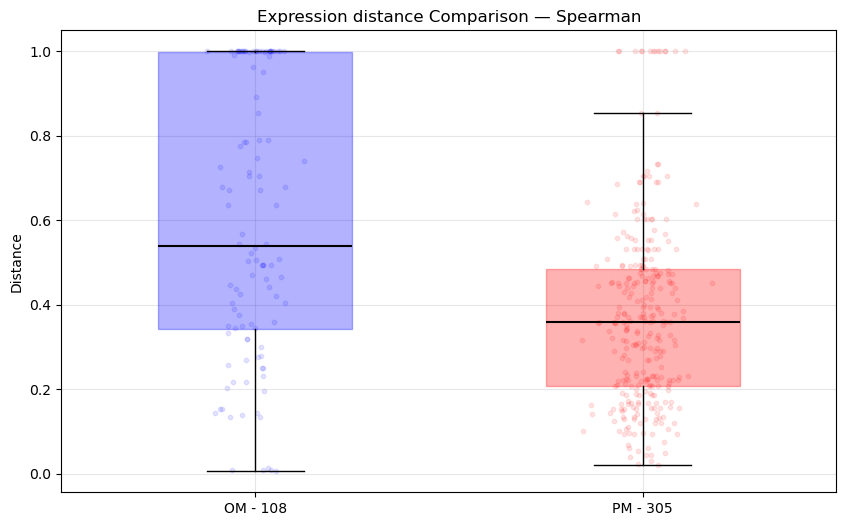

KS statistic: 0.367304189435337, p-value: 4.0992985696621806e-10


In [20]:
def plot_distance_boxplot_comparison(om_distances, pm_distances, label_1, label_2, metric, match_size=False, jitter=False):
    """
    Plot side-by-side boxplots (with scatter dots, notches, and medians)
    for OM and PM distance distributions.
    """
    # Convert to arrays and filter zeros
    om_distances = np.array(om_distances)
    pm_distances = np.array(pm_distances)
    om_distances = om_distances[om_distances > 0]
    pm_distances = pm_distances[pm_distances > 0]

    if match_size and len(om_distances) != len(pm_distances):    
        if len(pm_distances) > len(om_distances):
            pm_distances = np.random.choice(pm_distances, size=len(om_distances), replace=False)
        elif len(om_distances) > len(pm_distances):
            om_distances = np.random.choice(om_distances, size=len(pm_distances), replace=False)
        elif len(om_distances) == 0 or len(pm_distances) == 0:
            print("One of the distance sets is empty or only contains zeros.", file=sys.stderr)
            return

    data = [om_distances, pm_distances]
    labels = [f'{label_1} - {len(om_distances)}', f'{label_2} - {len(pm_distances)}']
    colors = ['blue', 'red']

    plt.figure(figsize=(10, 6))
    
    # Boxplot with notches and median lines
    box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.3)
        patch.set_edgecolor(color)
        box['medians'][0].set_color('black')
        box['medians'][1].set_color('black')
        box['medians'][0].set_linewidth(1.5)
        box['medians'][1].set_linewidth(1.5)

    if jitter:
        for i, dist in enumerate(data, start=1):
            x_jitter = np.random.normal(i, 0.05, size=len(dist))
            plt.scatter(x_jitter, dist, alpha=0.1, color=colors[i-1], s=10)

    plt.ylabel('Distance')
    plt.title(f'Expression distance Comparison — {metric.capitalize()}')
    plt.grid(alpha=0.3)
    plt.show()

    # KS test
    ks_stat, p_value = ks_2samp(om_distances, pm_distances)
    print(f"KS statistic: {ks_stat}, p-value: {p_value}", file=sys.stderr)
    
plot_distance_boxplot_comparison(om_distances, pm_distances, 'OM', 'PM', metric, match_size=False, jitter=True)

____________________

In [21]:
np.random.seed(42)

mirna_pairs = []
mirna_indices = df_coseq.index.tolist()
print(f"Number of miRNAs: {len(mirna_indices)}", file=sys.stderr)

# generate a set of 1000 random pairs of miRNAs (from the indices of df_coseq)
mirna_pairs = [(np.random.choice(mirna_indices), np.random.choice(mirna_indices)) for _ in range(1000)]

distances = {}
for mirna_1, mirna_2 in mirna_pairs:
	distance = pair_dist(mirna_1, mirna_2, df_coseq, metric)
	if distance is not None:
		distances[(mirna_1, mirna_2)] = distance


Number of miRNAs: 1761
Vector 1: [  0.      0.      0.      5.      7.      4.      3.      7.      8.
   8.5     6.      6.     11.      9.5    13.      4.      5.      4.
   4.      5.333   2.      0.      1.      3.      1.      0.      5.
   1.      1.      1.      3.      3.      0.      0.      5.      3.
   2.      2.      0.      0.      2.      3.      0.      4.      3.
   6.      5.      2.      1.      0.      2.      3.      2.      3.
   1.      2.      1.      0.      2.      2.      9.      5.      3.
   0.      4.      2.      2.      5.      6.      2.      5.      0.
   6.      6.      1.      2.      3.      3.      4.      8.      1.
   1.      0.      1.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      1.     30.5    21.5    15.5    31.833 176.5
   8.5    19.5    43.833   8.      5.     28.333  19.5     0.      2.
   1.      6.     13.      3.5     1.      0.5     5.   ]
Vector 2: [ 3.   8.   5.   6.   1.   3.   3.  12.  14.  28.  27.  36

/tmp/ipykernel_36240/3338570640.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


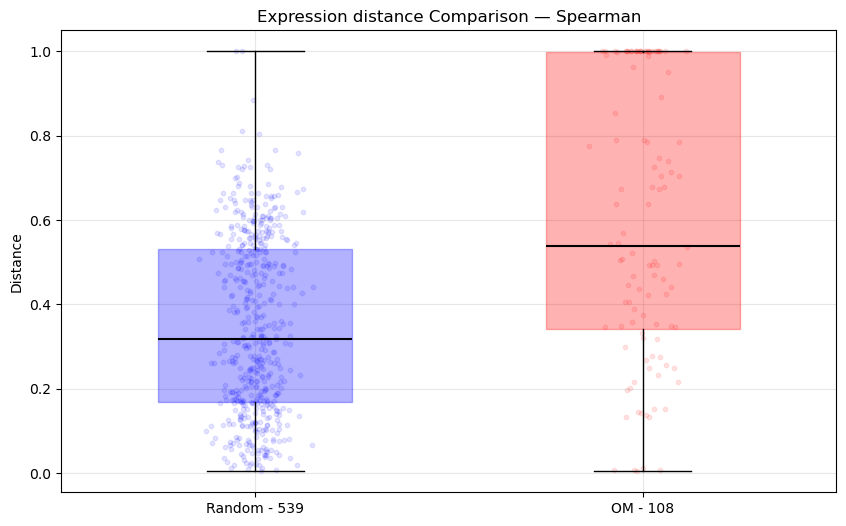

KS statistic: 0.4073215144643716, p-value: 5.691101814757182e-14
/tmp/ipykernel_36240/3338570640.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)


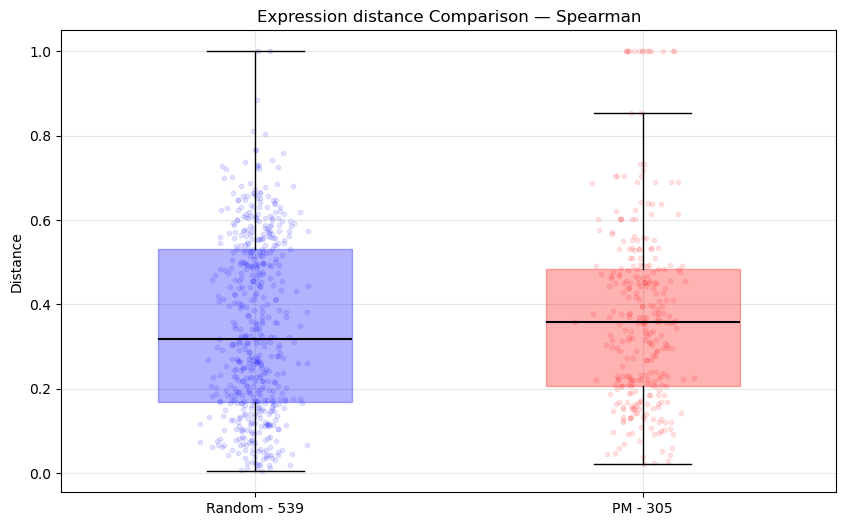

KS statistic: 0.09788618875269929, p-value: 0.043982415426976985


In [22]:
plot_distance_boxplot_comparison(list(distances.values()), om_distances, 'Random', 'OM', metric, match_size=False, jitter=True)
plot_distance_boxplot_comparison(list(distances.values()), pm_distances, 'Random', 'PM', metric, match_size=False, jitter=True)